In [1]:
#Центральная предельная теорема
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:
def get_freq(nums, a, b, k):
    freq = [0] * (k + 1)
    step = (b - a) / k
    x = []
    first_elem = a
    while first_elem <= b:
        x.append(first_elem)
        first_elem += step
    if(len(x) < len(freq) and x[-1] < b):
        x.append(b)
    for num in nums:
        for i in range(len(x) - 1):
            if x[i] <= num < x[i+1]:
                freq[i] += 1
                break
    freq = [x / len(nums) for x in freq]
    print(sum(freq))
    return [freq, x]

In [5]:
def T_normal(n):
    k1 = 1
    k2 = 2
    k3 = 5
    k4 = 4
    numbers = []
    for i in range(n):
        T = random.uniform(0, k1) + random.uniform(0, k2) + random.uniform(0, k3) + random.uniform(0, k4)
        numbers.append(T)
    return numbers

In [6]:
k1 = 1
k2 = 2
k3 = 5
k4 = 4

K = k1 + k2 + k3 + k4

M = k1 / 2 + k2 / 2 + k3 / 2 + k4 / 2
D = (k1 ** 2) / 12 + (k2 ** 2) / 12 + (k3 ** 2) / 12 + (k4 ** 2) / 12
S = D ** 0.5

N = [10, 20, 50, 100, 200, 500, 1000]
print("Мат. ожидание ", M)
print("Дисперсия ", D)
print("Ср. квадр. отклонение ", S)

Мат. ожидание  6.0
Дисперсия  3.833333333333333
Ср. квадр. отклонение  1.9578900207451218


1.0


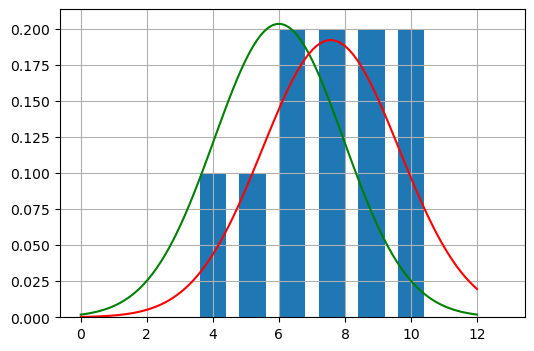

Мат.ожидание  7.57003855522466
Дисперсия  4.295626551942265
Средне квадратичное отклонение  2.0725893350932463
1.0


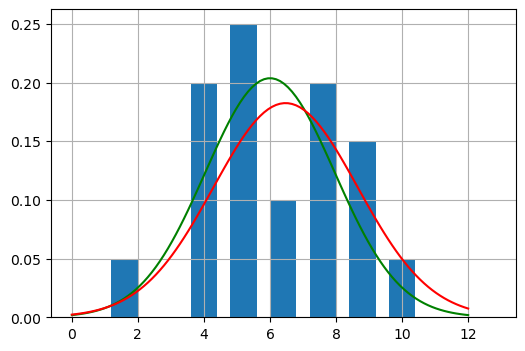

Мат.ожидание  6.471455445076404
Дисперсия  4.776189189536524
Средне квадратичное отклонение  2.1854494250694807
1.0


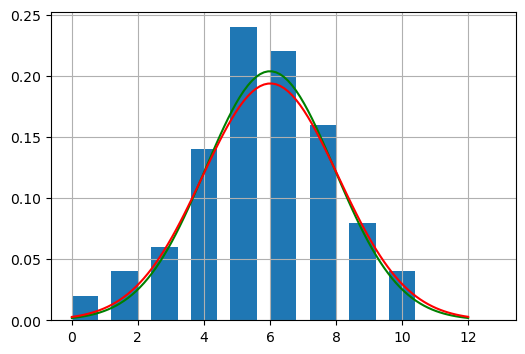

Мат.ожидание  6.010996608621179
Дисперсия  4.239334658092674
Средне квадратичное отклонение  2.058964462561866
1.0


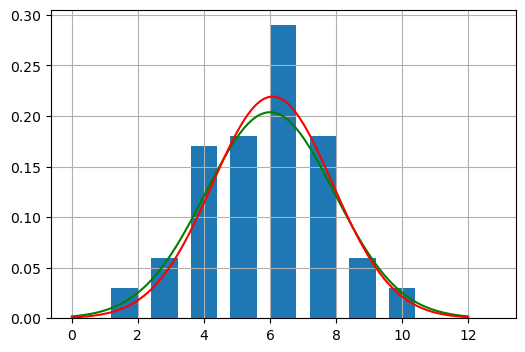

Мат.ожидание  6.07697653707034
Дисперсия  3.311959838123659
Средне квадратичное отклонение  1.8198790723901572
1.0


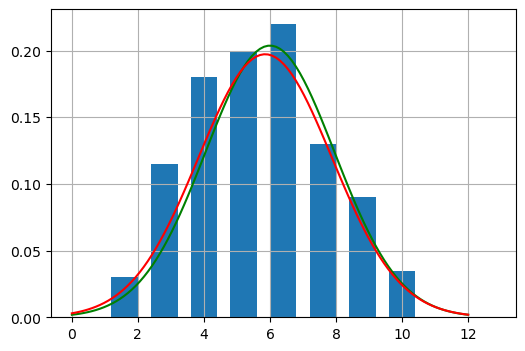

Мат.ожидание  5.853740153931024
Дисперсия  4.088948425907078
Средне квадратичное отклонение  2.0221148399403726
1.0


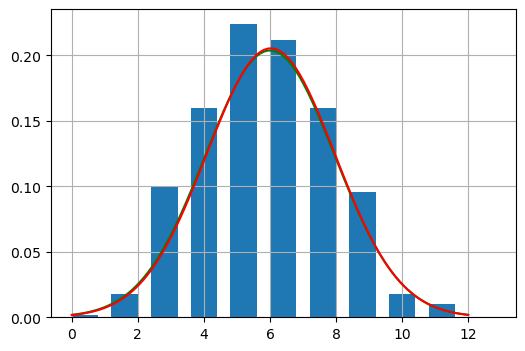

Мат.ожидание  6.024045259578647
Дисперсия  3.772438576198566
Средне квадратичное отклонение  1.9422766476994378
1.0


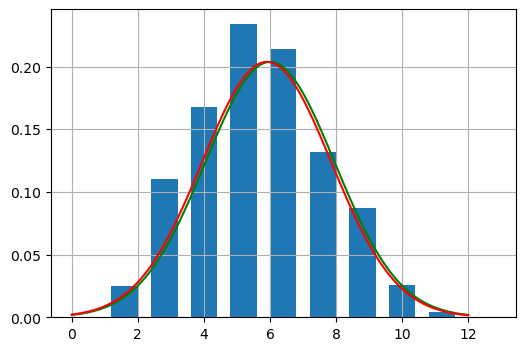

Мат.ожидание  5.899715529208246
Дисперсия  3.8326887951423743
Средне квадратичное отклонение  1.9577254136222408


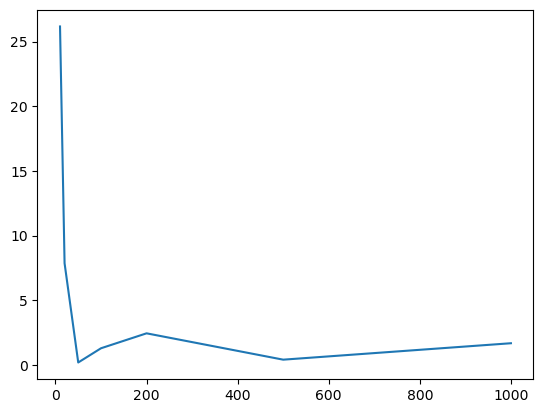

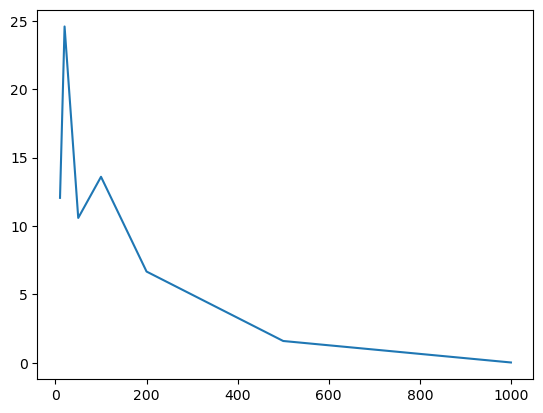

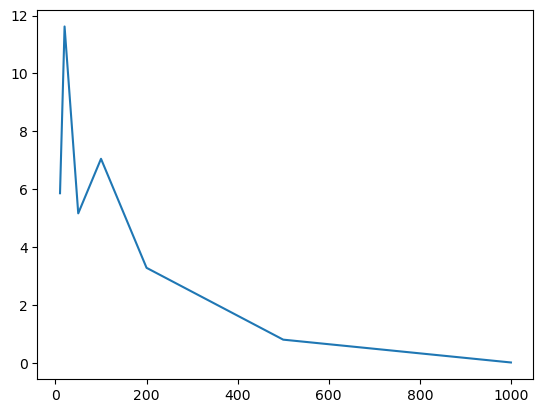

In [12]:
delta_d = []
delta_m = []
delta_s = []
for n in N:
    
    nums = T_normal(n)

    arr = get_freq(nums, 0, K, 10)

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    
    x = arr[1]
    y = arr[0]
    
    m = sum(nums) / len(nums)
    d = ((sum([x ** 2 for x in nums]) / len(nums)) - m ** 2) * ((len(nums)) / (len(nums) - 1))
    s = d ** 0.5
    
    x_t = np.linspace(0, K, 100)
    y_t = (1 / ((2 * math.pi) ** 0.5 * S)) * math.e ** ((-1 / 2) * ((x_t - M) / (S)) ** 2)
    y_p = (1 / ((2 * math.pi) ** 0.5 * s)) * math.e ** ((-1 / 2) * ((x_t - m) / (s)) ** 2)

    ax.bar(x, y, align='edge', width=0.8)
    #ax.hist(np.array(nums), density=True)
    ax.grid()
    
    plt.plot(x_t, y_t, color="green")
    plt.plot(x_t, y_p, color="red")
    plt.show()

    print("Мат.ожидание ", m)
    print("Дисперсия ", d)
    print("Средне квадратичное отклонение ", s)

    delta_m.append(abs(((m - M) / M) * 100))
    delta_d.append(abs(((d - D) / D) * 100))
    delta_s.append(abs(((s - S) / S) * 100))


plt.plot(N, delta_m)
plt.show()
plt.plot(N, delta_d)
plt.show()
plt.plot(N, delta_s)
plt.show()
